In [ ]:
# for i in runs/*12__20*_w2_*/*/; do python -m playground.evaluate with experiment_dir=$i; done

In [86]:
import pandas as pd
import numpy as np
import math
import json
import glob
import csv
import re
import os

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['png']

In [111]:
dirs = glob.glob("../runs/*12__20*_w2_*/*/") + glob.glob("../runs/*00_00__w2*/*/")
names = [re.findall("w2.*_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__20_09_06__w2_traj/1/', 'traj'), ('../runs/2019_07_12__20_09_06__w2_traj/4/', 'traj')]


In [11]:
def read_data(path):
    with open(os.path.join(path, "evaluate.json"), 'r') as jfile:
        return json.load(jfile)

In [12]:
read_data(dirs[0])

{'torque': 16.05569839477539, 'joint_angle': 8.591248512268066}

In [15]:
def read_column(paths, column):
    return [read_data(path)[column] for path in paths]

In [65]:
np.min(read_column(dirs, "joint_angle"))

3.38163423538208

In [92]:
def compute_stats(xs, ys):
    grouped = {}
    for x, y in zip(xs, ys):
        if not x in grouped:
            grouped[x] = []
        grouped[x].append(y)
    keys = sorted(grouped.keys())
    xs = np.array([k for k in keys])
    means = np.array([np.mean(grouped[k]) for k in keys])
    mins = np.array([np.min(grouped[k]) for k in keys])
    maxs = np.array([np.max(grouped[k]) for k in keys])
    return xs, means, means-mins, maxs - means
        
        
def draw_barplot(dirs, names, columns, ax=None, ylabel=""):
    width = 0.2  # the width of the bars
    capsize = 3
    
    colors = ['r', 'b', 'y']
    
    index = np.arange(len(set(names)))
    
    if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111)
    
    for i, column in enumerate(columns):
        x1 = names
        y1 = read_column(dirs, column)
        x, ymean, yl, yh = compute_stats(x1, y1)

        ax.bar(index + i*width, ymean, width, yerr=[yl, yh], capsize=capsize, color=colors[i], label=column)

    ax.set_ylabel(ylabel)
    ax.set_xticks(index + width * (len(columns)/2 - 0.5))
    ax.set_xticklabels(x)
    plt.legend(loc='upper right')
    
    return ax

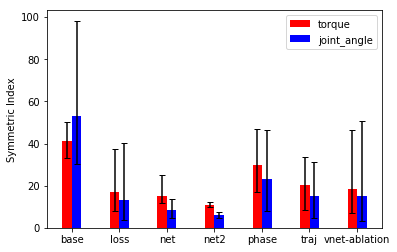

In [112]:
ax = draw_barplot(dirs, names, ["torque", "joint_angle"], ylabel="Symmetric Index")

In [104]:
dirs = glob.glob("../runs/*12__17_4*w3*/*/") + ["../runs/2019_07_12__20_35_43__w3_karen_4/1"]
names = [re.findall("w3_([^\/]*)", path)[0] for path in dirs]
print(list(zip(dirs, names))[:2])

[('../runs/2019_07_12__17_45_48__w3_phase/1/', 'phase'), ('../runs/2019_07_12__17_45_48__w3_phase/4/', 'phase')]


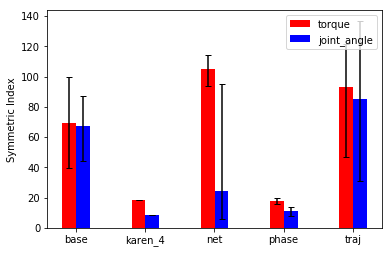

In [105]:
ax = draw_barplot(dirs, names, ["torque", "joint_angle"], ylabel="Symmetric Index")